In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [115]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [35]:
# df_new = df[df['gender'] == 'Male']
# df_new.value_counts().sum()

In [40]:
df_churn=df[df["Churn"]=="Yes"]
df_churn.head(2)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
left=df.groupby("Churn").agg({"customerID":"count"})
left.columns= ["Customer left"]
left

,Customer left
Churn,
No,5174
Yes,1869


<AxesSubplot:xlabel='Churn', ylabel='Customer left'>

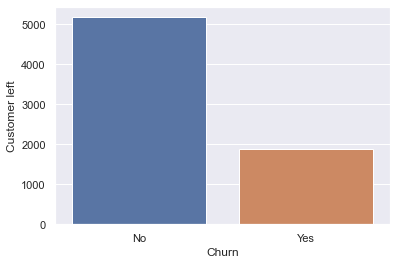

In [195]:
sns.set(rc={'figure.figsize':(6,4)})
sns.barplot(data=left,x=left.index,y="Customer left")


In [27]:
df_churn_gender = df_churn.groupby(["gender",]).agg({"customerID":"count"})
df_churn_gender.columns=["Customer left"]
df_churn_gender

,Customer left
gender,
Female,939
Male,930


<AxesSubplot:xlabel='gender', ylabel='Customer left'>

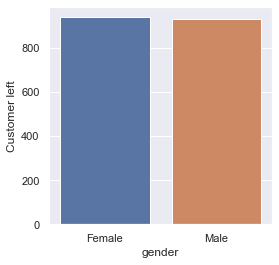

In [34]:
sns.set(rc={'figure.figsize':(4,4)})
sns.barplot(data=df_churn_gender,x=df_churn_gender.index ,y="Customer left")


In [261]:
df_churn_SeniorCitizen = df_churn.groupby(["SeniorCitizen",]).agg({"customerID":"count"})
df_churn_SeniorCitizen.columns=["Customer left"]
df_churn_SeniorCitizen

,Customer left
SeniorCitizen,
0,1393
1,476


<AxesSubplot:xlabel='SeniorCitizen', ylabel='Customer left'>

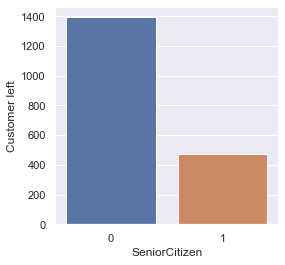

In [283]:
sns.set(rc={'figure.figsize':(4,4)})
sns.barplot(data=df_churn_SeniorCitizen,x=df_churn_SeniorCitizen.index ,y="Customer left")

In [263]:
df_churn_Partner = df_churn.groupby(["Partner",]).agg({"customerID":"count"})
df_churn_Partner.columns=["Customer left"]
df_churn_Partner

,Customer left
Partner,
No,1200
Yes,669


<AxesSubplot:xlabel='Partner', ylabel='Customer left'>

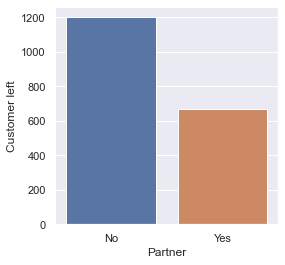

In [284]:
sns.set(rc={'figure.figsize':(4,4)})
sns.barplot(data=df_churn_Partner,x=df_churn_Partner.index ,y="Customer left")

In [265]:
df_churn_Dependents = df_churn.groupby(["Dependents",]).agg({"customerID":"count"})
df_churn_Dependents.columns=["Customer left"]
df_churn_Dependents

,Customer left
Dependents,
No,1543
Yes,326


<AxesSubplot:xlabel='Dependents', ylabel='Customer left'>

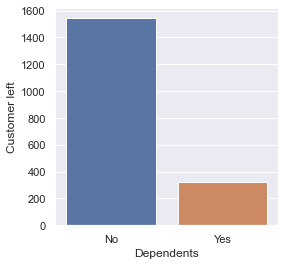

In [285]:
sns.set(rc={'figure.figsize':(4,4)})
sns.barplot(data=df_churn_Dependents,x=df_churn_Dependents.index ,y="Customer left")

In [42]:
df_churn_tenure = df_churn.groupby(["tenure",]).agg({"customerID":"count"})
df_churn_tenure.columns=["Customer left"]
df_churn_tenure

,Customer left
tenure,
1,380
2,123
3,94
4,83
5,64
...,...
68,9
69,8
70,11


<AxesSubplot:xlabel='tenure', ylabel='Customer left'>

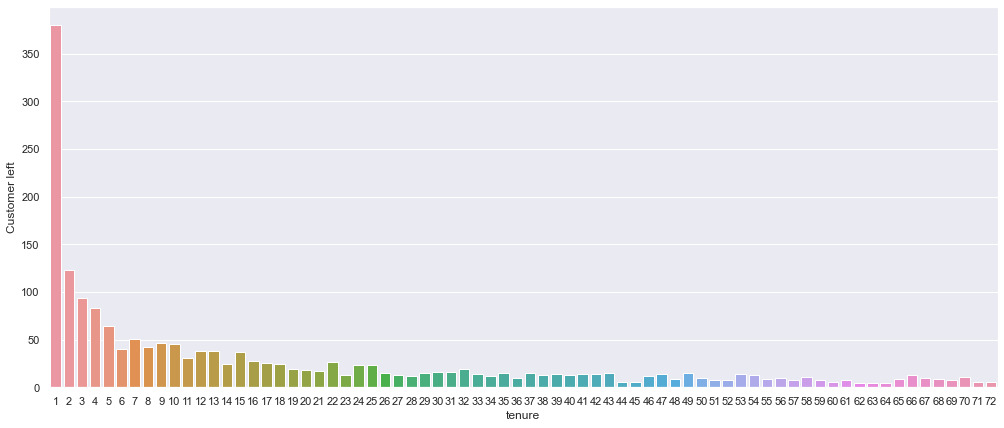

In [43]:
sns.set(rc={'figure.figsize':(17,7)})
sns.barplot(data=df_churn_tenure,x=df_churn_tenure.index ,y="Customer left")

In [46]:
df_churn_PhoneService = df_churn.groupby(["PhoneService",]).agg({"customerID":"count"})
df_churn_PhoneService.columns=["Customer left"]
df_churn_PhoneService

,Customer left
PhoneService,
No,170
Yes,1699


<AxesSubplot:xlabel='PhoneService', ylabel='Customer left'>

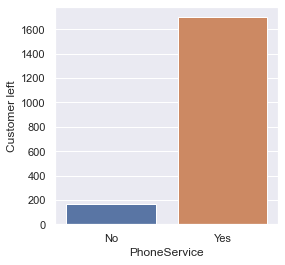

In [47]:
sns.set(rc={'figure.figsize':(4,4)})
sns.barplot(data=df_churn_PhoneService,x=df_churn_PhoneService.index ,y="Customer left")

In [48]:
df_churn_Mu = df_churn.groupby(["MultipleLines"]).agg({"customerID":"count"})
df_churn_Mu.columns=["Customer left"]
df_churn_Mu

,Customer left
MultipleLines,
No,849
No phone service,170
Yes,850


<AxesSubplot:xlabel='MultipleLines', ylabel='Customer left'>

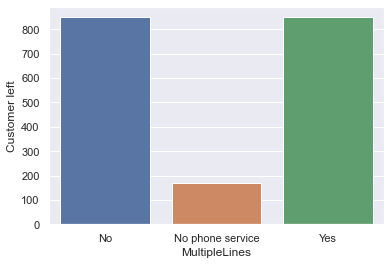

In [49]:
sns.set(rc={'figure.figsize':(6,4)})
sns.barplot(data=df_churn_Mu,x=df_churn_Mu.index ,y="Customer left")

In [50]:
df_churn_IN = df_churn.groupby(["InternetService"]).agg({"customerID":"count"})
df_churn_IN.columns=["Customer left"]
df_churn_IN

,Customer left
InternetService,
DSL,459
Fiber optic,1297
No,113


<AxesSubplot:xlabel='InternetService', ylabel='Customer left'>

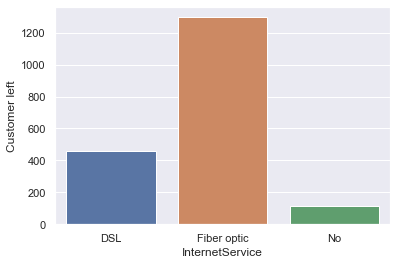

In [51]:
sns.set(rc={'figure.figsize':(6,4)})
sns.barplot(data=df_churn_IN,x=df_churn_IN.index ,y="Customer left")

In [52]:
df_churn_OS = df_churn.groupby(["OnlineSecurity"]).agg({"customerID":"count"})
df_churn_OS.columns=["Customer left"]
df_churn_OS

,Customer left
OnlineSecurity,
No,1461
No internet service,113
Yes,295


<AxesSubplot:xlabel='OnlineSecurity', ylabel='Customer left'>

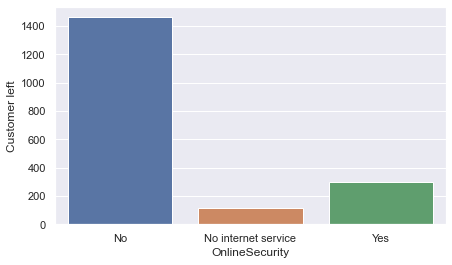

In [53]:
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(data=df_churn_OS,x=df_churn_OS.index ,y="Customer left")

In [54]:
df_churn_OB = df_churn.groupby(["OnlineBackup"]).agg({"customerID":"count"})
df_churn_OB.columns=["Customer left"]
df_churn_OB

,Customer left
OnlineBackup,
No,1233
No internet service,113
Yes,523


<AxesSubplot:xlabel='OnlineBackup', ylabel='Customer left'>

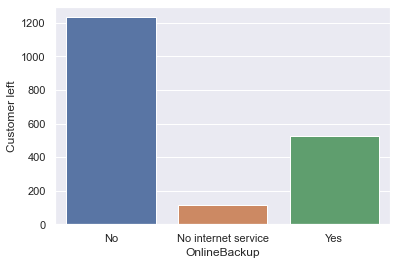

In [55]:
sns.set(rc={'figure.figsize':(6,4)})
sns.barplot(data=df_churn_OB,x=df_churn_OB.index ,y="Customer left")

In [56]:
df_churn_DP = df_churn.groupby(["DeviceProtection"]).agg({"customerID":"count"})
df_churn_DP.columns=["Customer left"]
df_churn_DP

,Customer left
DeviceProtection,
No,1211
No internet service,113
Yes,545


<AxesSubplot:xlabel='DeviceProtection', ylabel='Customer left'>

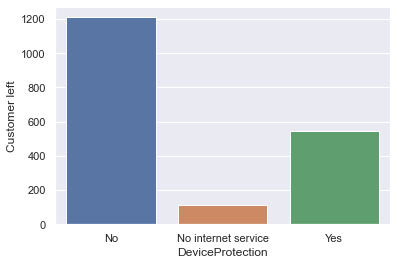

In [57]:
sns.set(rc={'figure.figsize':(6,4)})
sns.barplot(data=df_churn_DP,x=df_churn_DP.index ,y="Customer left")

In [58]:
df_churn_TS = df_churn.groupby(["TechSupport"]).agg({"customerID":"count"})
df_churn_TS.columns=["Customer left"]
df_churn_TS

,Customer left
TechSupport,
No,1446
No internet service,113
Yes,310


<AxesSubplot:xlabel='TechSupport', ylabel='Customer left'>

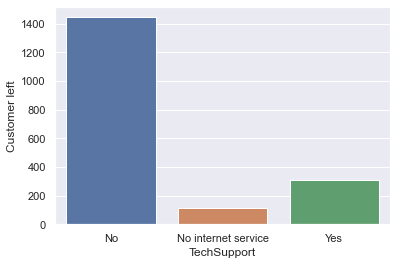

In [59]:
sns.set(rc={'figure.figsize':(6,4)})
sns.barplot(data=df_churn_TS,x=df_churn_TS.index ,y="Customer left")

In [60]:
df_churn_ST = df_churn.groupby(["StreamingTV"]).agg({"customerID":"count"})
df_churn_ST.columns=["Customer left"]
df_churn_ST

,Customer left
StreamingTV,
No,942
No internet service,113
Yes,814


<AxesSubplot:xlabel='StreamingTV', ylabel='Customer left'>

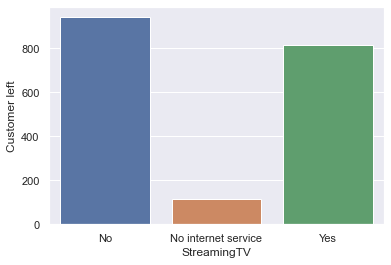

In [61]:
sns.set(rc={'figure.figsize':(6,4)})
sns.barplot(data=df_churn_ST,x=df_churn_ST.index ,y="Customer left")

In [62]:
df_churn_SM = df_churn.groupby(["StreamingMovies"]).agg({"customerID":"count"})
df_churn_SM.columns=["Customer left"]
df_churn_SM

,Customer left
StreamingMovies,
No,938
No internet service,113
Yes,818


<AxesSubplot:xlabel='StreamingMovies', ylabel='Customer left'>

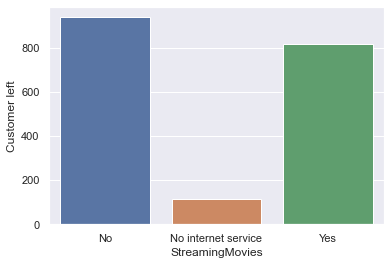

In [63]:
sns.set(rc={'figure.figsize':(6,4)})
sns.barplot(data=df_churn_SM,x=df_churn_SM.index ,y="Customer left")

In [64]:
df_churn_contract = df_churn.groupby(["Contract"]).agg({"customerID":"count"})
df_churn_contract.columns=["Customer left"]
df_churn_contract

,Customer left
Contract,
Month-to-month,1655
One year,166
Two year,48


<AxesSubplot:xlabel='Contract', ylabel='Customer left'>

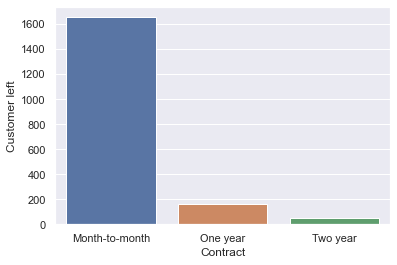

In [65]:
sns.set(rc={'figure.figsize':(6,4)})
sns.barplot(data=df_churn_contract,x=df_churn_contract.index ,y="Customer left")

In [66]:
df_churn_PaperlessBilling = df_churn.groupby(["PaperlessBilling"]).agg({"customerID":"count"})
df_churn_PaperlessBilling.columns=["Customer left"]
df_churn_PaperlessBilling

,Customer left
PaperlessBilling,
No,469
Yes,1400


<AxesSubplot:xlabel='PaperlessBilling', ylabel='Customer left'>

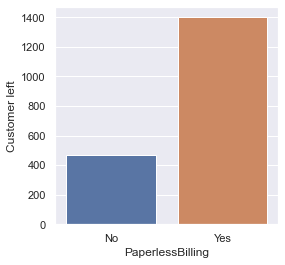

In [67]:
sns.set(rc={'figure.figsize':(4,4)})
sns.barplot(data=df_churn_PaperlessBilling,x=df_churn_PaperlessBilling.index ,y="Customer left")

In [68]:
df_churn_PaymentMethod = df_churn.groupby(["PaymentMethod"]).agg({"customerID":"count"})
df_churn_PaymentMethod.columns=["Customer left"]
df_churn_PaymentMethod

,Customer left
PaymentMethod,
Bank transfer (automatic),258
Credit card (automatic),232
Electronic check,1071
Mailed check,308


<AxesSubplot:xlabel='PaymentMethod', ylabel='Customer left'>

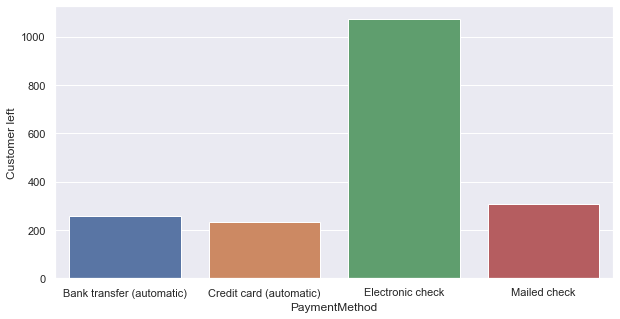

In [69]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data=df_churn_PaymentMethod,x=df_churn_PaymentMethod.index ,y="Customer left")

In [70]:
df_churn_MonthlyCharges = df_churn.groupby(["MonthlyCharges"]).agg({"customerID":"count"})
df_churn_MonthlyCharges.columns=["Customer left"]
df_churn_MonthlyCharges


,Customer left
MonthlyCharges,
18.85,1
18.95,1
19.00,1
19.10,1
19.25,3
...,...
115.65,1
116.20,1
117.45,1


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Customer left'>

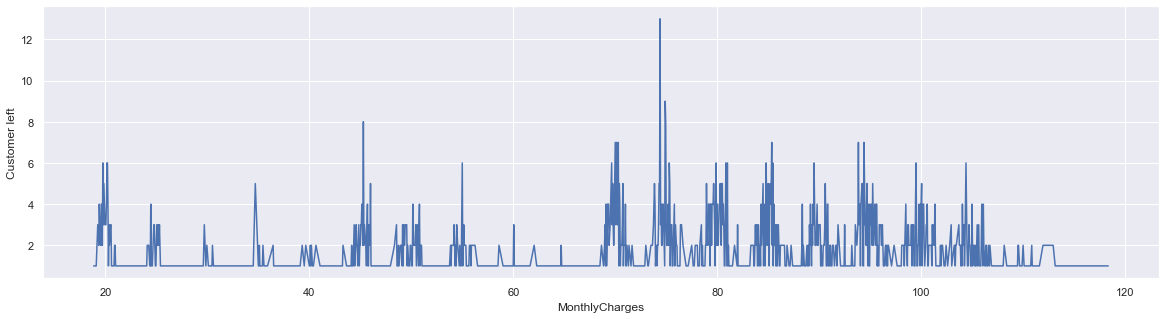

In [73]:
sns.set(rc={'figure.figsize':(20,5)})
sns.lineplot(data=df_churn_MonthlyCharges,x=df_churn_MonthlyCharges.index ,y="Customer left")

In [74]:
df_churn_TotalCharges = df_churn.groupby(["TotalCharges"]).agg({"customerID":"sum"})
df_churn_TotalCharges.columns=["Customer left"]
df_churn_TotalCharges


,Customer left
TotalCharges,
100.25,3178-FESZO
100.4,7802-EFKNY
100.8,7216-EWTRS
1008.55,5138-WVKYJ
1008.7,5228-EXCET
...,...
990.9,8443-WVPSS
994.55,7459-RRWQZ
994.8,6227-HWPWX


In [75]:
df_churn_TotalCharges[df_churn_TotalCharges["Customer left"]=="7216-EWTRS"]

,Customer left
TotalCharges,
100.8,7216-EWTRS


In [76]:
df_churn_TotalCharges[df_churn_TotalCharges["Customer left"]=="7459-RRWQZ"]

,Customer left
TotalCharges,
994.55,7459-RRWQZ


In [100]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [129]:
model_columns = ['InternetService','PaymentMethod', 'Churn']
model_df = df[model_columns].copy()

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X = model_df.drop(['Churn'], 1)
y = model_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['float', 'int']).columns

numerical_transformer = Pipeline(steps=[
    ('scalar', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('scalar', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ]
)


In [135]:
for cf in categorical_features:
    display(df[cf].value_counts().sum())

7043

7043

In [136]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")
)
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.758694109297374
              precision    recall  f1-score   support

          No       0.82      0.86      0.84      1036
         Yes       0.55      0.48      0.51       373

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.75      1409



In [138]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
)
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6841731724627396
              precision    recall  f1-score   support

          No       0.88      0.66      0.76      1036
         Yes       0.44      0.75      0.56       373

    accuracy                           0.68      1409
   macro avg       0.66      0.70      0.66      1409
weighted avg       0.76      0.68      0.70      1409



In [139]:
pd.DataFrame(
{
    'Features': clf.steps[0][1].get_feature_names_out(),
    'Importance': clf['classifier'].feature_importances_
}).sort_values('Importance', ascending=False)

,Features,Importance
1,cat__InternetService_Fiber optic,0.319534
5,cat__PaymentMethod_Electronic check,0.252137
2,cat__InternetService_No,0.189731
0,cat__InternetService_DSL,0.088722
4,cat__PaymentMethod_Credit card (automatic),0.070497
3,cat__PaymentMethod_Bank transfer (automatic),0.052275
6,cat__PaymentMethod_Mailed check,0.027104
